# Tugas 3 Decision Tree 


-

Nama : **Muhammad Adam Zaky Jiddyansah**

NIM  : **210411100234**


-


In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/adamzakys/SourceFiles/main/PenambanganData/Iris.csv')

data = df.shape[0]
df.head(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Langkah pertama yaitu mengecek nilai yang hilang/kosong pada data

In [3]:
df_copy = df.copy()
df_copy.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Selanjutnya mengganti nilai yang memiloki tanda tanya "?" menjadi nilai kosong

In [4]:
df_copy = df_copy.replace('?',np.nan)

Cek ulang berapakah nilai yang kosong pada dataset

In [5]:
df_copy.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik/float maka perlu diganti type datanya

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**1. Decision Tree**

In [7]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Memisahkan fitur dan label target

In [8]:
df_DecisionTree = df_copy.copy()
X = df_DecisionTree[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df_DecisionTree['Species']

Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

Membuat model Decision Tree dengan metode impurity criterion Gini

In [10]:
# membuat klasifikasi Decision Tree dengan kedalaman maksimum 3 dan kriteria pemisahan (splitting) Gini impurity.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# memasukkan model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]')

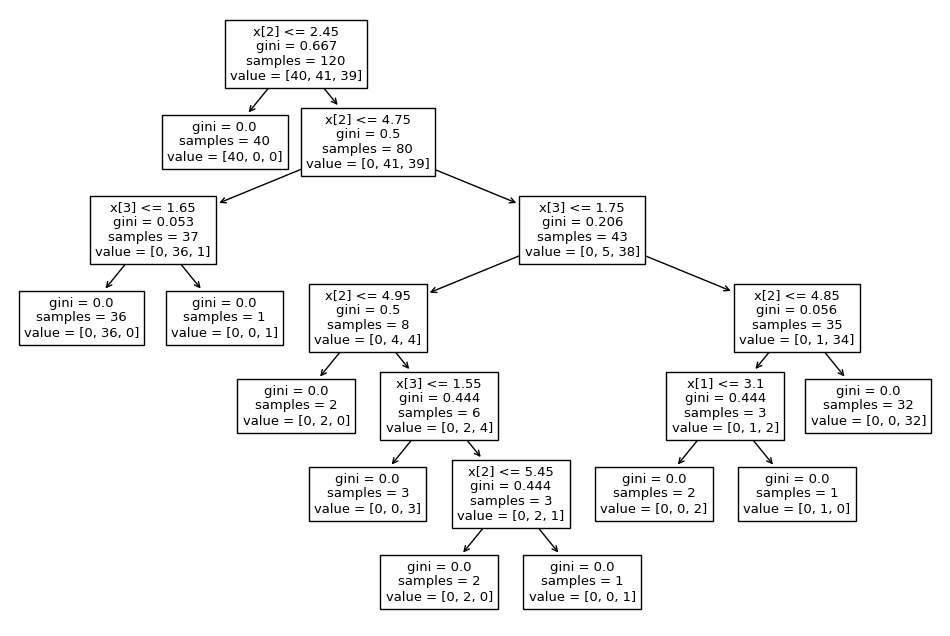

In [11]:
# membuat figure dengan ukuran 12x8 inch (atau sekitar 30x20 cm).
plt.figure(figsize=(12,8))

# membuat visualisasi decision tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

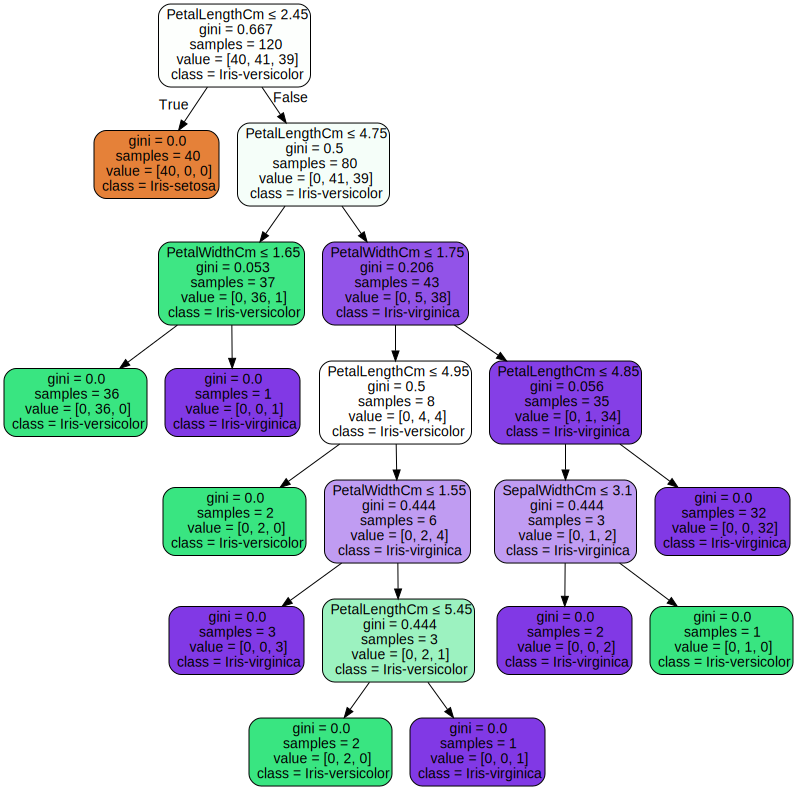

In [12]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train.unique(),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [13]:
# menghitung akurasi pada data training
y_pred_train_gini = clf_gini.predict(X_train)
print("Accuracy on training set (Gini): {:.2f}".format(accuracy_score(y_train, y_pred_train_gini)))

# menghitung akurasi pada data testing
y_pred_gini = clf_gini.predict(X_test)
print("Accuracy on testing set (Gini): {:.2f}".format(accuracy_score(y_test, y_pred_gini)))
     

Accuracy on training set (Gini): 1.00
Accuracy on testing set (Gini): 1.00


**2. KNN**

In [14]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import LabelEncoder

Mengubah tipe data kategorikal menjadi tipe data numerik

In [15]:
df_Knn = df_copy.copy()
le = LabelEncoder()
df_Knn['Species'] = le.fit_transform(df_Knn['Species'])

In [16]:
df_Knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [17]:
df_Knn.head(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Untuk melakukannya normalisasi data, tujuannya adalah untuk mengubah setiap nilai menjadi dalam kisaran antara 0 hingga 1. Kami akan memanfaatkan metode min-max, yang didefinisikan sebagai: (x - min) / (max - min). Ada juga rumus lain yang bisa digunakan, seperti metode simple feature scaling atau metode z-score. Namun, penting untuk diingat bahwa kolom target (kolom species) tidak akan mengalami normalisasi.

Rumus :
$$
x_{n e w}=\frac{x_{\text {old }}-x_{\min }}{x_{\max }-x_{\min }}
$$

In [18]:
species_column = df_Knn['Species']
df_Knn = df_Knn[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()
df_Knn = (df_Knn - df_Knn.min())/(df_Knn.max() - df_Knn.min())
df_Knn['Species'] = species_column.copy()
df_Knn.head(data)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Sebelum langkah membagi dataset, penting untuk melakukan pengacakan acak pada data.

Untuk memulai, kita akan menginisialisasi objek knn dari kelas KNeighborsRegressor yang menerapkan algoritma K-Nearest Neighbors untuk melakukan regresi. Setelah itu, kita akan menggunakan np.random.permutation() untuk secara acak mengacak indeks dataset. Untuk memastikan hasil yang konsisten, kita akan menggunakan seed 1 saat melakukan pengacakan.

In [19]:
knn = KNeighborsRegressor()

np.random.seed(1)
index_shuffled = np.random.permutation(df_Knn.index)
shuffled_car_data = df_Knn.loc[index_shuffled]

Data training akan menggunakan 80% dari keseluruhan dataset, sementara sisanya 20% akan digunakan untuk pengujian.

Ukuran dataset yang telah diacak akan dihitung menggunakan atribut shape, lalu dikalikan dengan 0.80 untuk mendapatkan indeks data terakhir yang akan digunakan sebagai batas untuk melatih model. Hasilnya akan disimpan dalam variabel train_index. Dataset shuffled_car_data kemudian akan dibagi menjadi dua bagian: data latih (training data) dan data uji (testing data).

In [20]:
train_index = int(shuffled_car_data.shape[0] * 0.80)
training_data = shuffled_car_data.iloc[0:train_index]
testing_data = shuffled_car_data.iloc[train_index:]

In [21]:
knn.fit(training_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], training_data['Species'])

KNeighborsRegressor()

Memprediksi label (spesies) pada data uji

In [22]:
prediction = knn.predict(testing_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

In [23]:
accuracy = np.mean(np.abs(prediction - testing_data['Species']) <= 0.5)

print(f"Akurasi model KNN: {accuracy:.2%}")

Akurasi model KNN: 96.67%


**3. Naive Bayes**

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [25]:
df_NaiveBayes = df_copy.copy()
le = LabelEncoder()
df_NaiveBayes['Species'] = le.fit_transform(df_NaiveBayes['Species'])

In [26]:
df_NaiveBayes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [27]:
df_NaiveBayes.head(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


Melakukan normalisasi data, yaitu mengubah setiap nilai ke dalam rentang antara 0 hingga 1. Kita akan menggunakan metode min-max, yaitu: x - min / max - min. Terdapat juga rumus-rumus lain yang dapat digunakan, misalnya metode simple feature scaling atau metode z-score. Namun perlu diingat bahwa kolom target tidak akan dinormalisasi (kolom species).

Rumus :

$$
x_{n e w}=\frac{x_{\text {old }}-x_{\min }}{x_{\max }-x_{\min }}
$$

In [28]:
species_column = df_NaiveBayes['Species']
df_NaiveBayes = df_NaiveBayes[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].copy()
df_NaiveBayes = (df_NaiveBayes - df_NaiveBayes.min())/(df_NaiveBayes.max() - df_NaiveBayes.min())
df_NaiveBayes['Species'] = species_column.copy()
df_NaiveBayes.head(data)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


Pemotongan Data atau Data Slicing.

Pisahkan data menjadi data training dan data test (80/20). Kita dapat dengan mudah melakukan langkah ini menggunakan metode train_test_split() dari sklearn.

In [29]:
features = df_NaiveBayes.values[:,:4]
target = df_NaiveBayes.values[:,4]
features_train, features_test, target_train, target_test = train_test_split(features,target, test_size = 0.2, random_state = 42)

implementasi Gaussian Naive Bayes.

Setelah selesai preprocessing data. saatnya menerapkan algoritma pembelajaran mesin atau machine learning. Kita akan menggunakan modul GaussianNB sklearn.

In [30]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [31]:
accuracy = accuracy_score(target_test, target_pred, normalize = True)

print(f"Akurasi model Naive Bayes: {accuracy:.2%}")

Akurasi model Naive Bayes: 100.00%


**Kesimpulan**

Berdasarkan hasil yang diberikan di atas, terlihat bahwa akurasi model Decision Tree pada data training adalah 100% dan akurasi pada data testing juga mencapai 100%. Begitu pula dengan model Naive Bayes yang menghasilkan akurasi 100% pada kedua set data tersebut. 

Hal ini menunjukkan bahwa kedua model tersebut dapat memprediksi data dengan sangat baik, baik pada saat proses pelatihan maupun pengujian. Hasil akurasi yang sempurna pada kedua set data menunjukkan bahwa model-model tersebut mampu mengklasifikasikan data dengan benar dan sesuai dengan label yang sebenarnya.

Namun, pada model K-Nearest Neighbors (KNN)96.67%, meskipun memiliki performa yang baik, tidak mencapai tingkat akurasi yang sempurna. Hal ini menunjukkan bahwa model KNN mampu melakukan prediksi dengan baik, tetapi masih terdapat sedikit kesalahan dalam mengklasifikasikan beberapa data. Meskipun begitu, performa KNN tetap dianggap baik karena tingkat akurasinya yang cukup tinggi.

Dalam kesimpulannya, dapat dikatakan bahwa model Decision Tree dan Naive Bayes memiliki kemampuan prediksi yang sangat baik berdasarkan hasil akurasi yang sempurna pada kedua set data. Sedangkan model KNN juga memiliki performa yang baik meskipun tidak mencapai tingkat akurasi yang sempurna.